# Vocación Exportadora

In [243]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dtale
import matplotlib.ticker as ticker

In [244]:
expo_08_21 = pd.read_stata("G:/Mi unidad/SDDE/secretaria_desarrollo_economico_2022/2023/vocación_exportadora/BD_EXPO_2008_2021.dta")

In [245]:
expo_08_21.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 490029 entries, 0 to 490028
Data columns (total 7 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ANIO                    490029 non-null  float64
 1   DEPARTAMENTO_ORIGEN     490029 non-null  object 
 2   PAIS_DESTINO            490029 non-null  object 
 3   CODIGO_PARTIDA          490029 non-null  object 
 4   NOMBRE_PARTIDA          490029 non-null  object 
 5   DOLARES_FOB_CORRIENTES  490025 non-null  float64
 6   KGS_NETOS               490029 non-null  float64
dtypes: float64(3), object(4)
memory usage: 29.9+ MB


In [246]:
## número de elementos únicos de la partida arancelaria
len(expo_08_21["CODIGO_PARTIDA"].unique())

1280

In [247]:
# d = dtale.show(expo_08_21, ignore_duplicate = True)
# d

## Deflactar el valor exportado

In [248]:
### IPP exportados
# IPP_exp = [72.97, 82.41, 88.42, 103.16, 92.05, 94.26,
#             100, 104.15, 101.84, 107.35, 108.3, 117.04, 110.67, 161.79]
#IPC_usa = [210.228,215.949,219.179,225.672,229.601,233.049,234.812,236.525,241.432,246.524,251.233,256.974,260.474, 278.802]


In [249]:
# Ingreso deflactado ipc USA normalizado
def ipp_e(df):
    if (df["ANIO"]==2021):
        x =100
    elif (df["ANIO"]==2020):
        x = round((260.474/278.802)*100,2)
    elif (df["ANIO"]==2019):
        x = round((256.974/278.802)*100,2)
    elif (df["ANIO"]==2018):
        x = round((251.233/278.802)*100,2)
    elif (df["ANIO"]==2017):
        x = round((246.524/278.802)*100,2)
    elif (df["ANIO"]==2016):
        x = round((241.432/278.802)*100,2)
    elif (df["ANIO"]==2015):
        x = round((236.525/278.802)*100,2)
    elif (df["ANIO"]==2014):
        x = round((234.812/278.802)*100,2)
    elif (df["ANIO"]==2013):
        x = round((233.049/278.802)*100,2)
    elif (df["ANIO"]==2012):
        x = round((229.601/278.802)*100,2)
    elif (df["ANIO"]==2011):
        x = round((225.672/278.802)*100,2)
    elif (df["ANIO"]==2010):
        x = round((219.179/278.802)*100,2)
    elif (df["ANIO"]==2009):
        x = round((215.949/278.8029)*100,2)
    elif (df["ANIO"]==2008):
        x = round((210.228/278.802)*100,2)
    else:
        x = np.nan
    return(x)

In [250]:
### normalizar IPC DOLARES_FOB_CORRIENTES 
expo_08_21["ipp_e_norm"]= expo_08_21.apply(ipp_e,axis = 1)

In [251]:
# Construir deflactor
expo_08_21["deflactor"]= round((100/expo_08_21["ipp_e_norm"]),2)

In [252]:
## crear variable deflactada
expo_08_21["DOLARES_FOB_CONSTANTES"]= round((expo_08_21["DOLARES_FOB_CORRIENTES"]*expo_08_21["deflactor"]),2)

In [253]:
plt.clf()

<Figure size 576x396 with 0 Axes>

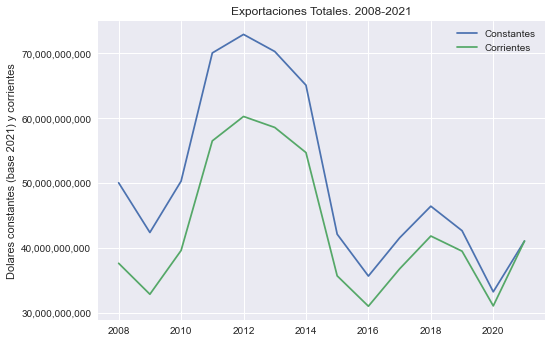

In [281]:
#Comparación de precios constantes y corrientes
plt.style.use('seaborn') #otros estilos default, 'seaborn', 'ggplot' o 'bmh'.
a = sns.lineplot(x="ANIO", y="DOLARES_FOB_CONSTANTES",  data =expo_08_21, ci = None,
                 label ="Constantes", estimator='sum')
b = sns.lineplot(x="ANIO", y="DOLARES_FOB_CORRIENTES", data =expo_08_21,ci = None, ax =a, 
                 label ="Corrientes", estimator='sum')
b.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
b.set_title("Exportaciones Totales. 2008-2021") #b.fig.suptitle
# Add x-axis and y-axis labels
b.set_xlabel(None)
b.set_ylabel("Dolares constantes (base 2021) y corrientes") #b.set(xlabel= None, ylabel="Dolares constantes y corrientes")
plt.legend()
#plt.close()
plt.savefig("G:/Mi unidad/SDDE/secretaria_desarrollo_economico_2022/2023/vocación_exportadora/a1.png", bbox_inches="tight")
plt.show()


In [255]:
#hacia_ven_bog[hacia_ven_bog["ANIO"]==2018]["DOLARES_FOB_CONSTANTES"].sum()

### A. Exportaciones colombianas y bogotanas a venezuela
participación de venezuela dentro del total exportado

In [256]:
##filtros
hacia_ven = expo_08_21[expo_08_21["PAIS_DESTINO"]=="Venezuela"] #de colombia hacia venezuela
hacia_ven_bog = hacia_ven[hacia_ven["DEPARTAMENTO_ORIGEN"]=="Bogotá"] # de bogotá hacia venezuela

In [257]:
##agrupación expor hacía venezuela
c_1 = hacia_ven.groupby(["ANIO"]).aggregate({"DOLARES_FOB_CONSTANTES":np.sum})

In [258]:
##agrupación expor totales
c_2 = expo_08_21.groupby(["ANIO"]).aggregate({"DOLARES_FOB_CONSTANTES":np.sum})

In [259]:
#agrupación participación de venezuela en el total exportado
c = round((c_1/c_2)*100,1)
c = c.reset_index()
c

,ANIO,DOLARES_FOB_CONSTANTES
0,2008,16
1,2009,12
2,2010,4
3,2011,3
4,2012,4
5,2013,4
6,2014,4
7,2015,3
8,2016,2
9,2017,1


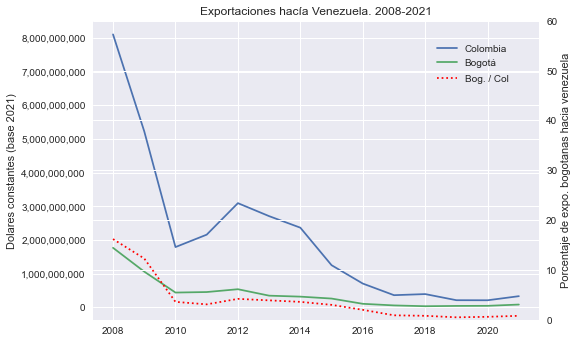

In [280]:
#gráfica
sns.lineplot(x="ANIO", y="DOLARES_FOB_CONSTANTES", data =hacia_ven, 
             ci = None, label ="Colombia", estimator='sum')
#se guarda como objeto para espcificar los valores del eje y, el titulo del gráfico y del eje. Esto se puede hacer en cualquiera de los gráficos sobrepuestos. Con uno es sufiente. 
b=sns.lineplot(x="ANIO", y="DOLARES_FOB_CONSTANTES",  
               data =hacia_ven_bog, ci = None, label ="Bogotá", estimator='sum')
# Crear un eje secundario para la tercera variable
ax = plt.gca()
ax2 = ax.twinx()
# crear la tercera variable y asignarla en objeto para cambiar tipo de linea
d = sns.lineplot(x="ANIO", y="DOLARES_FOB_CONSTANTES",  data =c, ci = None, 
             label ="Bog. / Col", estimator=None,color='red', ax=ax2)  
##cambiar tupo de linea en eje secundario
for line in d.lines:
    line.set_linestyle("dotted")
#hacer que la leyenda tenga el mismo estilo que la linea
legend = d.get_legend()
legend_line = legend.legendHandles[0]
legend_line.set_linestyle("dotted") #"solid", "dotted", "dashed", y "dashdot
# Establecer la escala en el eje secundario
ax2.set_ylim(0, 60)
#mostrar leyenda en la posición deseada:
ax.legend(loc='upper left', bbox_to_anchor=(0.75, 0.95), ncol=1)  #leyenda eje principal
ax2.legend(loc='upper left', bbox_to_anchor=(0.75, 0.85), ncol=1) #leyenda eje secundario

#par_2.set_yticklabels(np.arange(0,max(c["DOLARES_FOB_CONSTANTES"]),4)) #establece las etiqauetas desde cero hasta el maximo de 10 en 10.
#par_2.set_yticks(np.arange(0, max(c["DOLARES_FOB_CONSTANTES"]), 4)) #Establece las posiciones númericas dónde se mostraran las etiquetas del eje

#establecer titulo del eje y
ax2.set_ylabel("Porcentaje de expo. bogotanas hacia venezuela")
# asigna valores del eje y en el formato espcificado
#import matplotlib.ticker as ticker
b.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
b.set_title("Exportaciones hacía Venezuela. 2008-2021") #b.fig.suptitle
# Add x-axis and y-axis labels
b.set_xlabel(None)
b.set_ylabel("Dolares constantes (base 2021)") #b.set(xlabel= None, ylabel="Dolares constantes y corrientes")
#plt.legend()
plt.savefig("G:/Mi unidad/SDDE/secretaria_desarrollo_economico_2022/2023/vocación_exportadora/a2.png", bbox_inches="tight")
plt.show()

In [261]:
#exportaciones de bogotá al resto del mundo sin venezuela
bog_mundo = expo_08_21[(expo_08_21["DEPARTAMENTO_ORIGEN"]=="Bogotá") & (expo_08_21["PAIS_DESTINO"]!="Venezuela")]

In [262]:
#exportaciones de colombia a venezuela con respecto a las exportaciónes de colombia al resto del mundo sin venezuela
#colombia hacia_ven
col_mundo = expo_08_21[expo_08_21["PAIS_DESTINO"]!="Venezuela"]

In [263]:
# Proporción de exportaciones de bogotá a venezuela con respecto a las exportaciones bogotanas al resto del mundo.

b_v = hacia_ven_bog.groupby(["ANIO"]).aggregate({"DOLARES_FOB_CONSTANTES":np.sum}) # bogotá a vene.
b_m = bog_mundo.groupby(["ANIO"]).aggregate({"DOLARES_FOB_CONSTANTES":np.sum}) #bogotá al mundo sin vene.
vm = round((b_v/b_m)*100,1)
vm = vm.reset_index()
#exportaciones de colombia a venezuela con respecto a las exportaciónes de colombia al resto del mundo sin venezuela
c_v = hacia_ven.groupby(["ANIO"]).aggregate({"DOLARES_FOB_CONSTANTES":np.sum}) # bogotá a vene.
c_m = col_mundo.groupby(["ANIO"]).aggregate({"DOLARES_FOB_CONSTANTES":np.sum}) #bogotá al mundo sin vene.
cm = round((c_v/c_m)*100,1)
cm = cm.reset_index()

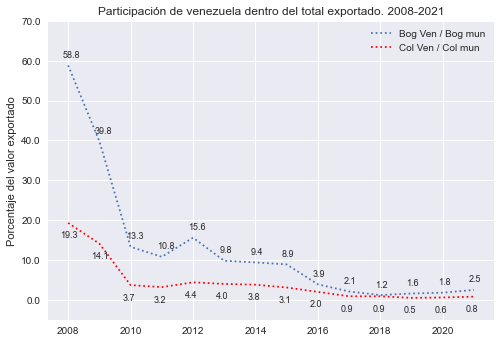

In [264]:
#grafíca
e = sns.lineplot(x="ANIO", y="DOLARES_FOB_CONSTANTES",  
               data =vm, ci = None, label ="Bog Ven / Bog mun", estimator='sum')
f = sns.lineplot(x="ANIO", y="DOLARES_FOB_CONSTANTES",  
               data =cm, ci = None, label ="Col Ven / Col mun", estimator='sum', color ='red')
#put to labels on line e
xe=e.get_lines()[0].get_data()[0] #get_lines()[] 0 para bogotá al mundo, 1 para bogotá; get_data()[] 0 eje x, 1 eje y
ye=e.get_lines()[0].get_data()[1]
for i,j in zip(xe,ye):
    e.annotate(j, xy=(i,j), textcoords="offset points", 
             xytext=(-5, 8), ha='left', fontsize=9)
#put to labels on line f
xf=f.get_lines()[1].get_data()[0] #get_lines()[] 0 para línea 1, 1 para línea 2; get_data()[] 0 eje x, 1 eje y
yf=f.get_lines()[1].get_data()[1]
for i,j in zip(xf,yf):
    f.annotate(j, xy=(i,j), textcoords="offset points", 
             xytext=(-8, -15), ha='left', fontsize=9)
##cambiar tipo de las dos lineas
for line_e, line_f in zip(e.lines,f.lines):
    line_e.set_linestyle("dotted")
    line_f.set_linestyle("dotted")
#hacer que la leyenda tenga el mismo estilo que la linea 1
legend = e.get_legend()
legend_line = legend.legendHandles[0]
legend_line.set_linestyle("dotted") #"solid", "dotted", "dashed", y "dashdot
#hacer que la leyenda tenga el mismo estilo que la linea 2
legend_f = f.get_legend()
legend_line_f = legend_f.legendHandles[1] #1 para la línea 2
legend_line_f.set_linestyle("dotted") #"solid", "dotted", "dashed", y "dashdot
# Establecer la escala en el eje secundario
e.set_ylim(-5, 70)
#e.set_xticks(range(2008, 2022, 1)) #ajusta la periodicidad delintervalo del eje x , y
e.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.1f}'))
e.set_title("Participación de venezuela dentro del total exportado. 2008-2021") #b.fig.suptitle
# Add x-axis and y-axis labels
e.set_xlabel(None)
e.set_ylabel("Porcentaje del valor exportado") #b.set(xlabel= None, ylabel="Dolares constantes y corrientes")
plt.savefig("G:/Mi unidad/SDDE/secretaria_desarrollo_economico_2022/2023/vocación_exportadora/a3.png", bbox_inches="tight")
plt.show()

### B. No. de productos totales exportados y con destino a Venezuela

In [265]:
plt.clf()

<Figure size 576x396 with 0 Axes>

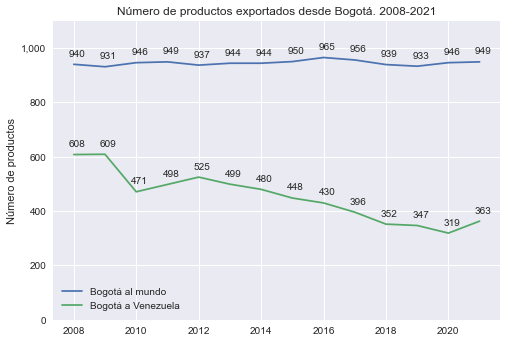

In [266]:
#Bogotá al resto del mundo sin venezuela
a=sns.lineplot(x="ANIO", y="CODIGO_PARTIDA", data=bog_mundo, ci=None, 
             label="Bogotá al mundo", estimator=lambda x: len(set(x))) #para valores únicos string; para valores únicos numericos unique()
#se guarda como objeto para espcificar los valores del eje y, el titulo del gráfico y del eje. Esto se puede hacer en cualquiera de los gráficos sobrepuestos. Con uno es sufiente. 
b=sns.lineplot(x="ANIO", y="CODIGO_PARTIDA",  
               data =hacia_ven_bog, ci = None, label ="Bogotá a Venezuela",
               estimator=lambda x: len(set(x)))
#etiquetas gráfica a
xa=a.get_lines()[0].get_data()[0] #get_lines()[] 0 para bogotá al mundo 1 para bogotá a venezuela; get_data()[] 0 eje x, 1 eje y
ya=a.get_lines()[0].get_data()[1]
for i,j in zip(xa,ya):
    b.annotate(j, xy=(i,j), textcoords="offset points", 
             xytext=(-5, 8), ha='left', fontsize=10)
#etiquetas gráfica b
xb=b.get_lines()[1].get_data()[0]
yb=b.get_lines()[1].get_data()[1]
for i,j in zip(xb,yb):
    b.annotate(j, xy=(i,j), textcoords="offset points", 
             xytext=(-5, 8), ha='left', fontsize=10)
# asigna valores del eje y en el formato espcificado
import matplotlib.ticker as ticker
b.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
b.set_ylim(0, 1100)
b.set_title("Número de productos exportados desde Bogotá. 2008-2021") #b.fig.suptitle
# Add x-axis and y-axis labels
b.set_xlabel(None)
b.set_ylabel("Número de productos") #b.set(xlabel= None, ylabel="Dolares constantes y corrientes")
plt.legend(loc='lower left')
plt.savefig("G:/Mi unidad/SDDE/secretaria_desarrollo_economico_2022/2023/vocación_exportadora/b1.png", bbox_inches="tight")
plt.show()

### Participación de los tres principales destinos de exportación, venezuela y otros, periodo 2008 - 2021

In [267]:
expo_08_21.columns

Index(['ANIO', 'DEPARTAMENTO_ORIGEN', 'PAIS_DESTINO', 'CODIGO_PARTIDA',
       'NOMBRE_PARTIDA', 'DOLARES_FOB_CORRIENTES', 'KGS_NETOS', 'ipp_e_norm',
       'deflactor', 'DOLARES_FOB_CONSTANTES'],
      dtype='object')

In [268]:
bog_total = expo_08_21[expo_08_21["DEPARTAMENTO_ORIGEN"]=="Bogotá"]
bt = bog_total.groupby(["ANIO", "PAIS_DESTINO"]).aggregate({"DOLARES_FOB_CONSTANTES":np.sum})
bt = bt.reset_index()
bt = bt.sort_values(by=['ANIO', 'DOLARES_FOB_CONSTANTES'], ascending=[True, False])
bt = bt.reset_index(drop =True)
#obtener los primeros tres valores por año
first_three = bt.groupby("ANIO").head(3)
first_three = first_three.reset_index(drop=True)

In [269]:
#total de las exportaciones por año"PART_DOL_CONS"
bta= bog_total.groupby(["ANIO"]).aggregate({"DOLARES_FOB_CONSTANTES":np.sum}) #bogotá al mundo sin vene.
bta = bta.reset_index()
first_three_m = first_three.merge(bta, on = "ANIO")
first_three_m["PART_DOL_CONS"] = round((first_three_m["DOLARES_FOB_CONSTANTES_x"]/first_three_m["DOLARES_FOB_CONSTANTES_y"])*100,1)
first_three_m

,ANIO,PAIS_DESTINO,DOLARES_FOB_CONSTANTES_x,DOLARES_FOB_CONSTANTES_y,PART_DOL_CONS
0,2008,Venezuela,1766601254,4769150709,37
1,2008,Estados Unidos,797159405,4769150709,17
2,2008,Ecuador,560657312,4769150709,12
3,2009,Venezuela,1059752672,3722160523,28
4,2009,Estados Unidos,626094613,3722160523,17
5,2009,Ecuador,448248830,3722160523,12
6,2010,Estados Unidos,905872078,3740204916,24
7,2010,Ecuador,581707864,3740204916,16
8,2010,Venezuela,438633442,3740204916,12
9,2011,Estados Unidos,1011788952,4640466155,22


In [270]:
first_three_m["PAIS_DESTINO"].value_counts()

Estados Unidos    14
Ecuador           14
Venezuela          8
Perú               4
México             2
Name: PAIS_DESTINO, dtype: int64

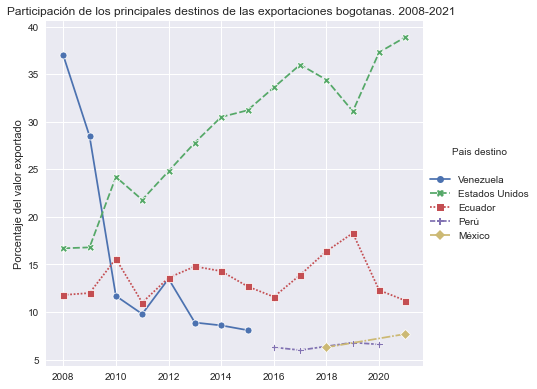

In [271]:
## gráfica 
# g = sns.catplot(x="ANIO", y="PART_DOL_CONS", data=first_three_m, kind="bar",
#                 hue= "PAIS_DESTINO")
g = sns.relplot(x="ANIO", y="PART_DOL_CONS", data=first_three_m, kind="line", 
                ci=None, hue= "PAIS_DESTINO", style="PAIS_DESTINO", markers=True, dashes=True,
               height=5.5, aspect=1.1) #leyend="brief", "full"
g.fig.suptitle("Participación de los principales destinos de las exportaciones bogotanas. 2008-2021",x=0.44, y = 1.01,
              horizontalalignment="center")
g.set(xlabel=None, 
       ylabel="Porcentaje del valor exportado")
g._legend.texts[0].set_text("")
g._legend.set_title("Pais destino")
#g.add_legend(title="Pais destino")
plt.savefig("G:/Mi unidad/SDDE/secretaria_desarrollo_economico_2022/2023/vocación_exportadora/c1.png", bbox_inches="tight")
plt.show()

### E. Top 20 de los productos exportados por bogotá al mundo y a Venezuela 2008 y 2020.

In [272]:
hacia_ven_bog.columns

Index(['ANIO', 'DEPARTAMENTO_ORIGEN', 'PAIS_DESTINO', 'CODIGO_PARTIDA',
       'NOMBRE_PARTIDA', 'DOLARES_FOB_CORRIENTES', 'KGS_NETOS', 'ipp_e_norm',
       'deflactor', 'DOLARES_FOB_CONSTANTES'],
      dtype='object')

In [273]:
# productos exportados de bogotá a venezuela
pro_bv = hacia_ven_bog.groupby(["ANIO", "CODIGO_PARTIDA", "NOMBRE_PARTIDA"]).aggregate({"DOLARES_FOB_CONSTANTES":np.sum}) # bogotá a vene.
pro_bv = pro_bv.reset_index()
pro_bv = pro_bv.sort_values(by=['ANIO', 'DOLARES_FOB_CONSTANTES'], ascending=[True, False])
pro_bv = pro_bv.reset_index(drop =True)
pro_bv_20 = pro_bv.groupby("ANIO").head(20)
pro_bv_20 = pro_bv_20.reset_index(drop=True)

In [274]:
pd.options.display.max_colwidth = 400
pd.options.display.float_format = '{:.0f}'.format #pd.options.display.max_columns, max_info_columns,precision, .float_format = '{:.2f}%'.format
pro_bv_20.head(5)

,ANIO,CODIGO_PARTIDA,NOMBRE_PARTIDA,DOLARES_FOB_CONSTANTES
0,2008,6004,"Tejidos de punto de anchura superior a 30 cm, con un contenido de hilados de elastómeros o de hilos de caucho superior o igual al 5% en peso, excepto los de la partida 60.01.",112291952
1,2008,8703,"Automóviles de turismo y demás vehículos automóviles concebidos principalmente para el transporte de personas (excepto los de la partida 87.02), incluidos los del tipo familiar («break» o «station wagon») y los de carreras.",108922149
2,2008,3004,"Medicamentos (excepto los productos de las partidas 30.02, 30.05 ó 30.06) constituidos por productos mezclados o sin mezclar, preparados para usos terapéuticos o profilácticos, dosificados (incluidos los administrados por vía trans-dérmica) o acondicionados para la venta al por menor.",83702770
3,2008,8504,"Transformadores eléctricos, convertidores eléctricos estáticos (por ejemplo: rectificadores) y bobinas de reactancia (autoinducción).",65943126
4,2008,3302,"Mezclas de sustancias odoríferas y mezclas (incluidas las disoluciones alcohólicas) a base de una o varias de estas sustancias, de los tipos utilizados como materias básicas para la industria; las demás preparaciones a base de sustancias odoríferas, de los tipos utilizados para la elaboración de bebidas.",50583697


In [275]:
# productos exportados de bogotá al mundo sin venezuela
pro_bm = bog_mundo.groupby(["ANIO", "CODIGO_PARTIDA", "NOMBRE_PARTIDA"]).aggregate({"DOLARES_FOB_CONSTANTES":np.sum}) # bogotá a vene.
pro_bm = pro_bm.reset_index()
pro_bm = pro_bm.sort_values(by=['ANIO', 'DOLARES_FOB_CONSTANTES'], ascending=[True, False])
pro_bm = pro_bm.reset_index(drop =True)
pro_bm_20 = pro_bm.groupby("ANIO").head(20)
pro_bm_20 = pro_bm_20.reset_index(drop=True)
pro_bm_20.head(5)

,ANIO,CODIGO_PARTIDA,NOMBRE_PARTIDA,DOLARES_FOB_CONSTANTES
0,2008,7306,"Los demás tubos y perfiles huecos (por ejemplo: soldados, remachados, grapados o con los bordes simplemente aproximados), de hierro o acero.",174461878
1,2008,1511,"Aceite de palma y sus fracciones, incluso refinado, pero sin modificar químicamente.",172045254
2,2008,2710,"Aceites de petróleo o de mineral bituminoso, excepto los aceites crudos; preparaciones no expresadas ni comprendidas en otra parte, con un contenido de aceites de petróleo o de mineral bituminoso superior o igual al 70 % en peso, en las que estos aceites constituyan el elemento base; desechos de aceites.",163905867
3,2008,0901,"Café, incluso tostado o descafeinado; cáscara y cascarilla de café; sucedáneos del café que contengan café en cualquier proporción.",133448218
4,2008,3004,"Medicamentos (excepto los productos de las partidas 30.02, 30.05 ó 30.06) constituidos por productos mezclados o sin mezclar, preparados para usos terapéuticos o profilácticos, dosificados (incluidos los administrados por vía trans-dérmica) o acondicionados para la venta al por menor.",118257632


In [276]:
#concatenar y exportar
pro_20 = pd.concat([pro_bm_20, pro_bv_20])
pro_20.to_excel("G:/Mi unidad/SDDE/secretaria_desarrollo_economico_2022/2023/vocación_exportadora/pro_20_bm_bv.xlsx", index =False)

<ipython-input-276-ac83854d45ba>:3: UserWarning:

Pandas requires version '1.4.3' or newer of 'xlsxwriter' (version '1.2.9' currently installed).



In [277]:
###quintiles de ingreso
#df8[j]=pd.qcut(df8[i], 5, labels=[1,2,3,4,5])

In [278]:
##pivot
# des_retro = dfprueba.pivot_table(values= ["tiempo_empleo"],
#                                   index=["tiempo_desemp", "ano_encuesta"],
#                                   columns=["camino"], aggfunc= ["count","mean"], margins = False, sort = True)
# round(des_retro ,2)#, 2).iloc[:, [1,4,]]]

In [279]:
## group by
# prueba2= df7.groupby(by=["Fecha","clasif_lab"]).aggregate({"edad": [np.size]})#, np.max, np.min, np.mean, np.std]})
# scar_table_1= dfprueba.groupby(by=["tiempo_desemp", "scar"]).aggregate({"edad": [np.size, np.max, np.min, np.mean, np.std],
#                                                                         "estrato": np.mean})
# t1= round(dfgroups.groupby(["ano", "scar2"], dropna=False).apply(
#     lambda x: pd.Series([np.ma.sum(np.ma.masked_array(
#         x["factorex_plong"], np.isnan(x["factorex_plong"]))), 
#                           x["id"].nunique()])),0).unstack().iloc[:,[0,2,1,3]]